# Inflation Insights Final Project

Group Members: Sam Pham, Abbad Chamma, Miguel Hernandez, Logan May

## Introduction

Inflation plays a significant role in financial stability and the purchasing power of consumers, influencing everything from daily expenses to long-term economic planning. As inflation fluctuates across global economies, understanding how economic indicators affect inflation is crucial for evaluating economic health. The main problem we want to address is determining how inflation impacts consumer purchasing power and identifying which economic factors influence inflation the most across various countries. To investigate this, we plan to analyze global inflation trends and examine how they relate to key financial indicators. We will do this by using regression and clustering models/techniques to find patterns on how inflation affects consumer purchasing power and identify which economic environments are more vulnerable to inflationary pressure.


## The Data

The data we will use in this project comes from an existing [Kaggle](https://www.kaggle.com/datasets/tanishksharma9905/global-economic-indicators-20102025) dataset called "Global Economic Indicators (2010–2025)- World bank" by Tanishk Sharma. This dataset has 16 key features including: Country Name, Country Id, Year, Inflation (Consumer Price Index %), GDP (Current USD), GDP per Capita, GDP Growth (% Annual), Unemployment Rate, Real Interest Rate, Public Debt (% of GDP), Government Expense and Revenue, Current Account Balance, Gross National Income, and Tax Revenue. There is also an abundance of data as there are over 3400 rows. These features provide a comprehensive view of the economic landscape across various countries, which makes this dataset well-suited for our problem. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pre_df = pd.read_csv("data/world_bank_data_2025.csv")
pre_df

,country_name,country_id,year,Inflation (CPI %),GDP (Current USD),GDP per Capita (Current USD),Unemployment Rate (%),"Interest Rate (Real, %)","Inflation (GDP Deflator, %)",GDP Growth (% Annual),Current Account Balance (% GDP),Government Expense (% of GDP),Government Revenue (% of GDP),Tax Revenue (% of GDP),Gross National Income (USD),Public Debt (% of GDP)
0,Aruba,aw,2010,2.078141,2.453597e+09,24093.140151,NaN,11.666131,-1.223407,-2.733457,-18.752537,NaN,NaN,NaN,2.313385e+09,NaN
1,Aruba,aw,2011,4.316297,2.637859e+09,25712.384302,NaN,4.801974,4.005674,3.369237,-9.877656,NaN,NaN,NaN,2.391841e+09,NaN
2,Aruba,aw,2012,0.627472,2.615208e+09,25119.665545,NaN,8.200875,0.184033,-1.040800,3.473451,NaN,NaN,NaN,2.499118e+09,NaN
3,Aruba,aw,2013,-2.372065,2.727850e+09,25813.576727,NaN,10.709709,-1.995948,6.431483,-11.813206,NaN,NaN,NaN,2.563517e+09,NaN
4,Aruba,aw,2014,0.421441,2.790850e+09,26129.839062,NaN,3.213869,3.958897,-1.586575,-4.658577,NaN,NaN,NaN,2.688102e+09,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3467,Zimbabwe,zw,2021,98.546105,2.724052e+10,1724.387731,9.540,-31.795551,113.294981,8.468017,1.278300,NaN,NaN,NaN,2.662178e+10,NaN
3468,Zimbabwe,zw,2022,104.705171,3.278975e+10,2040.552459,10.087,-36.833393,266.987152,6.139263,0.930064,NaN,NaN,NaN,3.202694e+10,NaN
3469,Zimbabwe,zw,2023,NaN,3.523137e+10,2156.034004,8.759,-73.540441,921.535652,5.336730,0.379995,NaN,NaN,NaN,3.479607e+10,NaN
3470,Zimbabwe,zw,2024,NaN,NaN,NaN,8.554,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Data Preprocessing

Before we can visualize and understand the data, we first need to clean the data. To start, we should take a look at the amount of null values in the data. 

In [2]:
print(pre_df.shape)
pre_df.isna().sum()

(3472, 16)


country_name                          0
country_id                            0
year                                  0
Inflation (CPI %)                   778
GDP (Current USD)                   539
GDP per Capita (Current USD)        534
Unemployment Rate (%)               677
Interest Rate (Real, %)            1737
Inflation (GDP Deflator, %)         568
GDP Growth (% Annual)               560
Current Account Balance (% GDP)     909
Government Expense (% of GDP)      1652
Government Revenue (% of GDP)      1643
Tax Revenue (% of GDP)             1639
Gross National Income (USD)         676
Public Debt (% of GDP)             2620
dtype: int64

As you can see from the output above, many of the key features have null or missing values. Handling these null values now is important because having null values later can lead to misleading results in our visualizations and models. Our script, *data_preprocessing.py*, has some basic preprocessing steps. If you take a look at the code, it removes duplicates, converts the years to integers, removes all rows where all of the economic data is missing, and finally sorts by country and year. Lets take a look at the data now.

In [3]:
df = pd.read_csv("preprocessed_data/world_bank_data_cleaned.csv")
print(df.shape)
df.isna().sum()

(3185, 16)


country_name                          0
country_id                            0
year                                  0
Inflation (CPI %)                   491
GDP (Current USD)                   252
GDP per Capita (Current USD)        247
Unemployment Rate (%)               390
Interest Rate (Real, %)            1450
Inflation (GDP Deflator, %)         281
GDP Growth (% Annual)               273
Current Account Balance (% GDP)     622
Government Expense (% of GDP)      1365
Government Revenue (% of GDP)      1356
Tax Revenue (% of GDP)             1352
Gross National Income (USD)         389
Public Debt (% of GDP)             2333
dtype: int64

Comparing the two outputs, we can see that around 300 rows were cleaned from the dataset. We can also see that the null values in most columns have decreased by about 300. So how can we further clean this data so that there are NO null values?

We need to explore each column and decide if the column can be dropped or if missing values should be filled in based on the type of data and its importance to the analysis.

Just by taking a quick look at the csv file, I can see that for each country in 2024, there are many null values. Although removing 2024 does remove some recent data, the amount of null values will just introduce noise to our clustering and regression models. Lets try removing the year 2024.

In [4]:
df = df[df["year"] != 2024]
print("Shape after removing 2024:", df.shape)

Shape after removing 2024: (2998, 16)


Alright, not too bad. It removed almost 200 rows. Now we should take a look at the key features. Since the total dataset is around 3000 rows, there are 5 columns with extremely high missingness. 
 - Public Debt (% of GDP) – 2333 missing (~73 percent missing)

 - Interest Rate (Real, %) – 1450 missing (~45 percent missing)

 - Government Expense (% of GDP) – ~43 percent missing

 - Government Revenue (% of GDP) – ~43 percent missing

 - Tax Revenue (% of GDP) – ~42 percent missing

These are incomplete for almost half or more of all country-years and every other column has manageable missingness (<25 percent). Too ease some concerns, these features are not the primary predictors of inflation. Although helpful, keeping it would introduce more distortion than insight. Therefore, dropping these columns will not inherently hurt our ability to study inflation and purchasing power.  

In [5]:
cols_to_drop = [
    "Public Debt (% of GDP)",
    "Interest Rate (Real, %)",
    "Government Expense (% of GDP)",
    "Government Revenue (% of GDP)",
    "Tax Revenue (% of GDP)"
]

df = df.drop(columns=cols_to_drop)
print(df.shape)
df.isna().sum()

(2998, 11)


country_name                         0
country_id                           0
year                                 0
Inflation (CPI %)                  429
GDP (Current USD)                   65
GDP per Capita (Current USD)        60
Unemployment Rate (%)              385
Inflation (GDP Deflator, %)         94
GDP Growth (% Annual)               86
Current Account Balance (% GDP)    435
Gross National Income (USD)        202
dtype: int64

Now that the null values are significantly less, we can move on to imputation. Since this is a countries x years economic time-series, we can use grouped interpolation by country instead of a global mean or median. This method is viable since economic indicators are smooth year-to-year so time-based interpolation is the most realistic method for this step in the data preprocessing. Take a look at the code:

In [6]:
df = df.sort_values(by=['country_name', 'year'])

numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

for col in numeric_cols:
    if col != 'year':
        df[col] = df.groupby('country_name')[col].transform(
            lambda x: x.interpolate(method='linear', limit_direction='both')
        )

print(df.isna().sum())

country_name                         0
country_id                           0
year                                 0
Inflation (CPI %)                  310
GDP (Current USD)                   14
GDP per Capita (Current USD)        14
Unemployment Rate (%)              380
Inflation (GDP Deflator, %)         36
GDP Growth (% Annual)               27
Current Account Balance (% GDP)    282
Gross National Income (USD)        131
dtype: int64


First we need to sort the data frame to ensure time-series interpolation works correctly. Then we select the numeric columns to apply interpolation to and apply grouped interpolation. The for loop groups by country so that the data from say Aruba does not bleed into Zimbabwe. However, this does still give us null values, why? The reason is that if a country has zero data for that specific feature across all the years, interpolation cannot invent a number since there are no historical data to reference. So the next best option to clean this data is to drop those rows. If a country is missing key economic features like Inflation or GDP, it most likely cannot be used in our analysis. However, we can also preserve some countries by using the global median for secondary features which avoids deleting a country just because it missed a minor metric. 

In [7]:
df = df.dropna(subset=['Inflation (CPI %)'])

features_to_fill = ['Unemployment Rate (%)', 'Current Account Balance (% GDP)', 'Gross National Income (USD)']

for col in features_to_fill:
    if col in df.columns:
         df[col] = df[col].fillna(df.groupby('year')[col].transform('median'))

print(df.isna().sum())
df.shape

country_name                       0
country_id                         0
year                               0
Inflation (CPI %)                  0
GDP (Current USD)                  0
GDP per Capita (Current USD)       0
Unemployment Rate (%)              0
Inflation (GDP Deflator, %)        0
GDP Growth (% Annual)              0
Current Account Balance (% GDP)    0
Gross National Income (USD)        0
dtype: int64


(2688, 11)

Perfect! Now all of the null values have been resolved.

## Data Understanding and Visualization

Now that all of our data has been cleaned of unrelated and null values, we can start to explore our problem: determining how inflation impacts consumer purchasing power and identifying which economic factors influence inflation the most across various countries.

### Correlation Heatmap of Economic Indicators


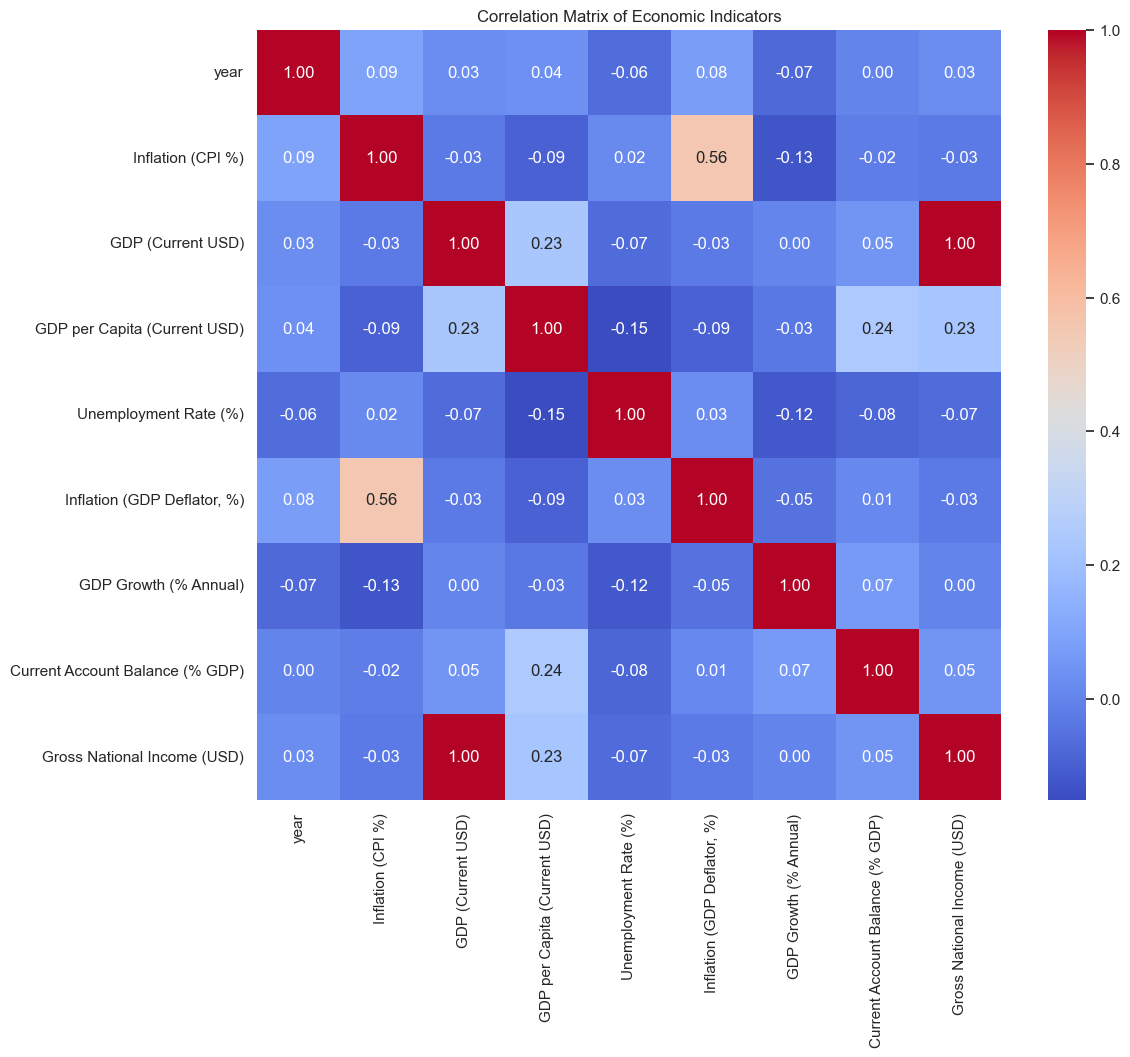

In [8]:
sns.set(style="whitegrid")

plt.figure(figsize=(12, 10))
corr = df.select_dtypes(include=['float64', 'int64']).corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of Economic Indicators")
plt.show()

The correlation heatmap reveals many important insights for our modeling strategy later. 

* Mid to High Positive Correlations: 
    * GDP & Gross National Income [1.00] - The dark red square indicates that these two key features are practically identical. 
    * Inflation (CPI %) & Inflation (GDP Deflator) [0.56] - These are essentially two different ways of measuring the same thing.

* Near Zero Correlations:
    * Inflation (CPI %) vs. Unemployment Rate [0.00] - This is the most shocking finding. An economic theory (the Phillips Curve) usually suggets that there is a inverse relationship between these two but the visualization shows zero linear correlation globally.
    * Inflation vs. GDP Growth [-0.01] - Similarly, there seems to be no direct linear correlation between how fast an economy grows and its inflation rate.

So what does this mean? This data suggets that we should drop redundant features to avoid model instability. The lack of linear relationships shown on the heatmap indicates that a "one-size-fits-all" linear regression model will likely fail. This makes sense as macro economic indicators are far from linear, so we should plan on implementing clustering first before applying a linear regression model. This allows us to group countries into distinct economic segments to show where these relationships actually exist.

### Global Inflation Trend Line Plot


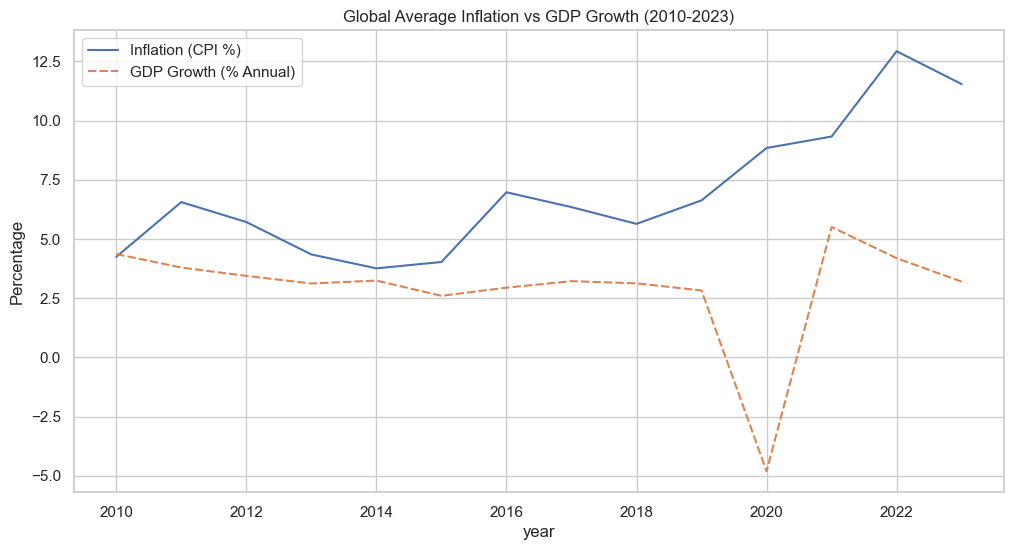

In [9]:
plt.figure(figsize=(12, 6))
global_trends = df.groupby('year')[['Inflation (CPI %)', 'GDP Growth (% Annual)']].mean()
sns.lineplot(data=global_trends)
plt.title("Global Average Inflation vs GDP Growth (2010-2023)")
plt.ylabel("Percentage")
plt.show()


This line graph tells the story of recent global economic shocks. Between the years of 2011 - 2015, the global average for inflation is steadily declining with the lowest point of infation being in 2014. This period represents somewhat of economic stability following the 2008 financial crisis. Many economies managed to keep inflation within predictable bounds. However, in 2016, we see a major spike in inflation and the years following a steady increase in inflation. In 2020, a dramatic increase in inflation occurs, where global average inflation is nearly doubled, peaking at 13.7% in 2022 due to COVID-19 and the contraints that came with it. However, although trending downwards, the data does not show a "return to normal" as 2024 - 2025 projections remain elevated at around 9%. 

On an average global scale in relation to GDP growth, the graph tells us that GDP growth remains mostly stable at around ~3% between the years 2010 - 2019. This also drastically changes in 2020 when the global pandemic took place. The COVID-19 pandemic dropped the global average GDP growth to a whopping -5% showing that countries cannot provide means to be productive in the economy. Following 2020, countries start up again trying to maintain the GDP growth they had before COVID-19. 

### Inflation vs Unemployment Scatter Plot


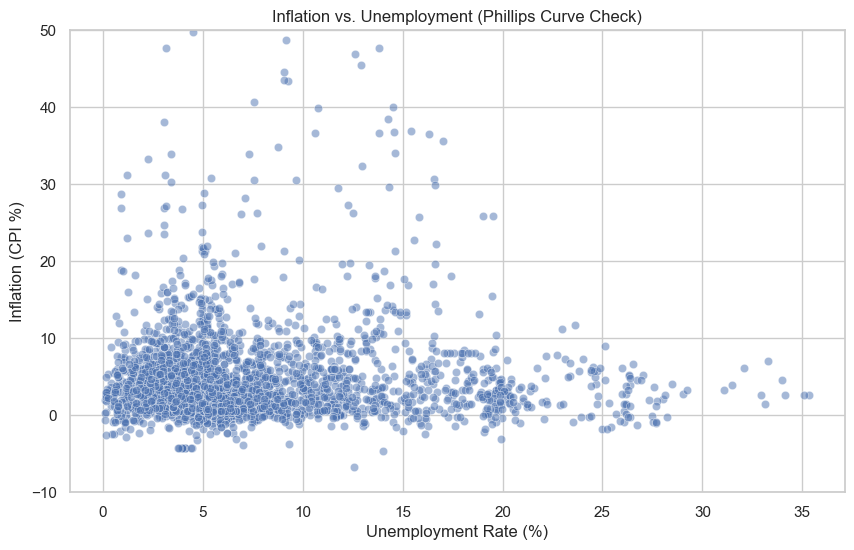

In [10]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Unemployment Rate (%)', y='Inflation (CPI %)', alpha=0.5)
plt.title("Inflation vs. Unemployment (Phillips Curve Check)")
plt.ylim(-10, 50)  
plt.show()

The scatter plot analysis of inflation versus inflation visualizes the failure of the Philips Curve on a global scale. Rather than the expected inverse relationship like we mentioned earlier, the data forms an unstructured cloud that defy standard linear modeling. This confirms that unemployment dynamics vary across different economic environments.

### Distribution of Inflation Histogram


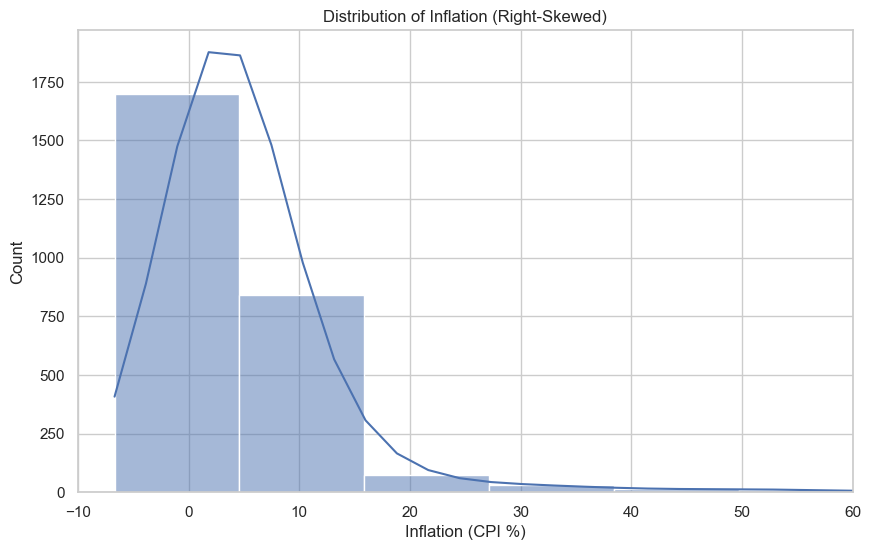

In [11]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Inflation (CPI %)'], bins=50, kde=True)
plt.title("Distribution of Inflation (Right-Skewed)")
plt.xlim(-10, 60) 
plt.show()


This histogram of inflation revelas a heavily right skewed distribution, where the majority of countries are in a low-medium inflation range. The long tail extending to the right tells us that the extreme outliers of countries with hyperinflation distort the dataset's mean and variance. This poses somewhat a challenge for our models as it can disproportionately influence the results. We can address this by applying transformations (log) to normalize the data and ensure our models do not just take in the extreme edge cases.

## Clustering


## Linear Regression

## Evaluation


## Impact


## Conclusion

## References

[Project Files](https://github.com/spham64/inflation-insights) (GitHub)

[Kaggle Dataset](https://www.kaggle.com/datasets/tanishksharma9905/global-economic-indicators-20102025)